Dans ce projet, nous allons analyser l'évolution du Covid 19 dans le monde
Source des données: https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide


Voici quelques questions qui peuvent guider notre analyse
* Quels sont les pays avec les plus grand nombres de cas ?
* Quels sont les pays avec un taux de mortalité élevé ?
* Le confinement a-t-il eu un effet sur le nombre de cas ?
* Comparer la situation par continent 

# Importer les données

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
!pip install xlrd==1.2.0

In [2]:
df=pd.read_excel('datasets/COVID-19-geographic-disbtribution-worldwide-2020-12-14.xlsx')
df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,2020-12-14,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,2020-12-13,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,2020-12-12,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,2020-12-11,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,2020-12-10,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61900 entries, 0 to 61899
Data columns (total 12 columns):
dateRep                                                       61900 non-null datetime64[ns]
day                                                           61900 non-null int64
month                                                         61900 non-null int64
year                                                          61900 non-null int64
cases                                                         61900 non-null int64
deaths                                                        61900 non-null int64
countriesAndTerritories                                       61900 non-null object
geoId                                                         61625 non-null object
countryterritoryCode                                          61777 non-null object
popData2019                                                   61777 non-null float64
continentExp                                   

In [4]:
df.describe()

,day,month,year,cases,deaths,popData2019,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
count,61900.000000,61900.000000,61900.000000,61900.000000,61900.000000,6.177700e+04,59021.000000
mean,15.628934,7.067157,2019.998918,1155.147237,26.055460,4.098770e+07,66.320586
std,8.841582,2.954776,0.032882,6779.224479,131.227055,1.531294e+08,162.329240
min,1.000000,1.000000,2019.000000,-8261.000000,-1918.000000,8.150000e+02,-147.419587
25%,8.000000,5.000000,2020.000000,0.000000,0.000000,1.293120e+06,0.757526
50%,15.000000,7.000000,2020.000000,15.000000,0.000000,7.169456e+06,6.724045
75%,23.000000,10.000000,2020.000000,273.000000,4.000000,2.851583e+07,52.572719
max,31.000000,12.000000,2020.000000,234633.000000,4928.000000,1.433784e+09,1900.836210


In [5]:
df.columns

Index(['dateRep', 'day', 'month', 'year', 'cases', 'deaths',
       'countriesAndTerritories', 'geoId', 'countryterritoryCode',
       'popData2019', 'continentExp',
       'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'],
      dtype='object')

In [6]:
# Calculating the percentage of null values:
# CODE:
df.isna().sum().sum()/len(df)

0.05492730210016155

In [7]:
df.dropna(inplace=True)

# Pays avec les plus grand nombres de cas

In [9]:
df.columns

Index(['dateRep', 'day', 'month', 'year', 'cases', 'deaths',
       'countriesAndTerritories', 'geoId', 'countryterritoryCode',
       'popData2019', 'continentExp',
       'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'],
      dtype='object')

In [15]:
df_by_country=df.groupby('countriesAndTerritories')['cases', 'deaths'].sum().sort_values('cases',ascending=False)
df_by_country

,cases,deaths
countriesAndTerritories,,
United_States_of_America,16256754,299177
India,9884100,143355
Brazil,6901952,181402
Russia,2653928,46941
France,2376852,57911
United_Kingdom,1849403,64170
Italy,1843712,64520
Spain,1730575,47624
Argentina,1498063,40764


# Pays avec Taux de mortalité élevé

In [16]:
df_by_country['mortality_rate']=df_by_country['deaths']/df_by_country['cases']

Text(0.5, 1.0, 'Countries with highest mortality rates')

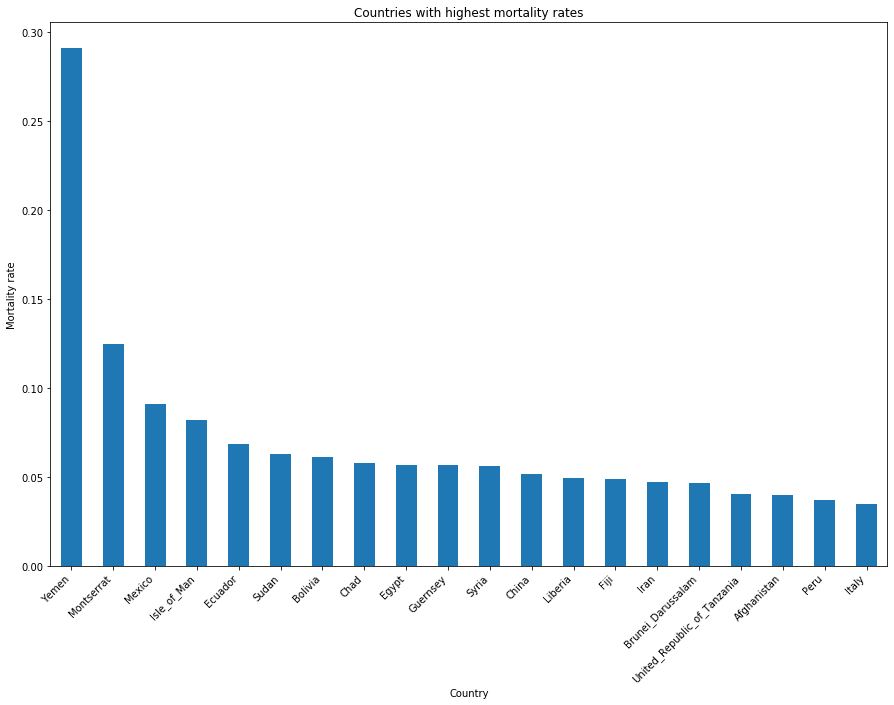

In [21]:
#Sorting the values for the mortality rate in the descending order
plt.figure(figsize=(15,10))
ax = df_by_country['mortality_rate'].sort_values(ascending=False).head(20).plot.bar()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
ax.set_xlabel("Country")
ax.set_ylabel("Mortality rate")
ax.set_title("Countries with highest mortality rates")

# Pays avec le plus de morts

Text(0, 0.5, 'Number of deaths')

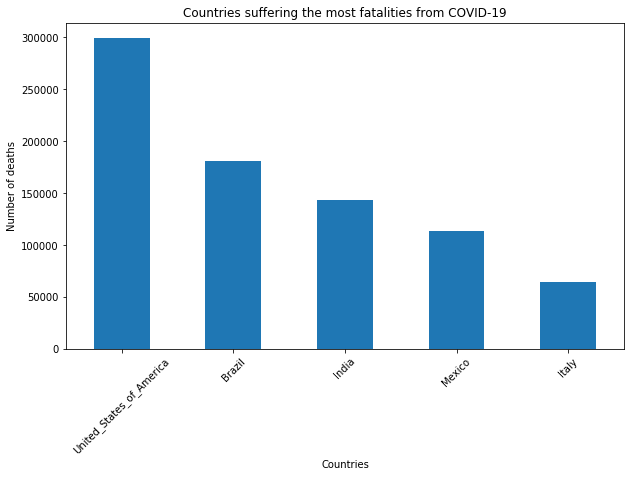

In [23]:
#sorting the number of deaths in the descending order
plt.figure(figsize=(10,6))
ax=df_by_country['deaths'].sort_values(ascending=False).head(5).plot(kind='bar')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title("Countries suffering the most fatalities from COVID-19")
ax.set_xlabel("Countries")
ax.set_ylabel("Number of deaths")

# Effet du confinement sur le nombre de cas

In [25]:
df_by_month = df.groupby('month')['cases','deaths'].sum()

In [26]:
df_by_month.head()

,cases,deaths
month,,
1,9767,212
2,74717,2702
3,714475,35668
4,2338739,189142
5,2891247,140118


Text(0, 0.5, 'Nombre de morts')

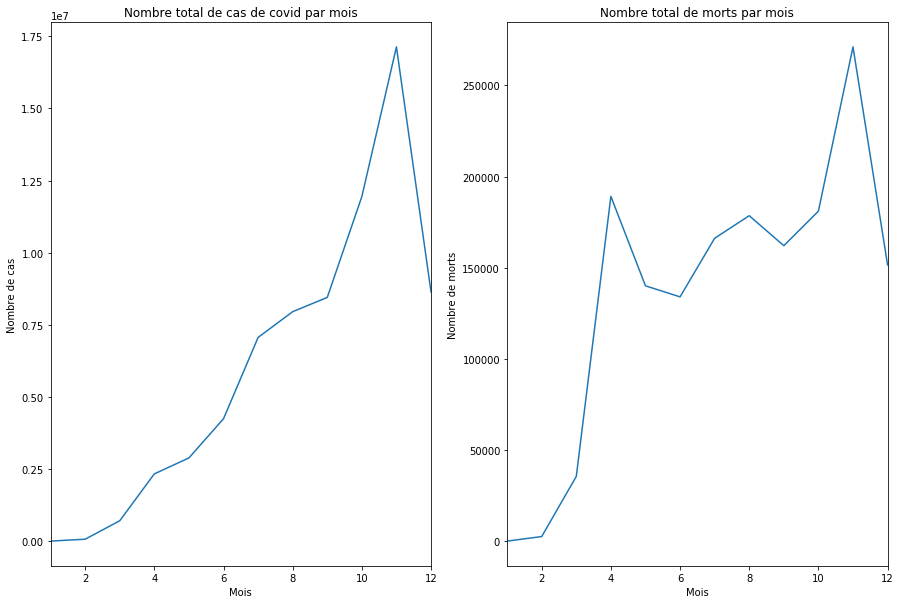

In [27]:
fig=plt.figure(figsize=(15,10))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)

df_by_month['cases'].plot(kind='line',ax=ax1)
ax1.set_title("Nombre total de cas de covid par mois")
ax1.set_xlabel("Mois")
ax1.set_ylabel("Nombre de cas")
df_by_month['deaths'].plot(kind='line',ax=ax2)
ax2.set_title("Nombre total de morts par mois")
ax2.set_xlabel("Mois")
ax2.set_ylabel("Nombre de morts")

Quand on regarde de façon globale on a pas l'impression d'une diminution. Essayons de voir le cas de certains pays en particulier, qui ont un confinement strict

In [29]:
df_germany = df[df.countriesAndTerritories == 'Germany']
df_germany_monthwise = df_germany.groupby('month')['cases','deaths'].sum()
df_germany_grouped = df_germany_monthwise.reset_index()


df_uk = df[df.countriesAndTerritories == 'United_Kingdom']
df_uk_monthwise = df_uk.groupby('month')['cases','deaths'].sum()
df_uk_grouped = df_uk_monthwise.reset_index()


df_france = df[df.countriesAndTerritories == 'France']
df_france_monthwise = df_france.groupby('month')['cases','deaths'].sum()
df_france_grouped = df_france_monthwise.reset_index()


df_italy = df[df.countriesAndTerritories == 'Italy']
df_italy_monthwise = df_italy.groupby('month')['cases','deaths'].sum()
df_italy_grouped = df_italy_monthwise.reset_index()

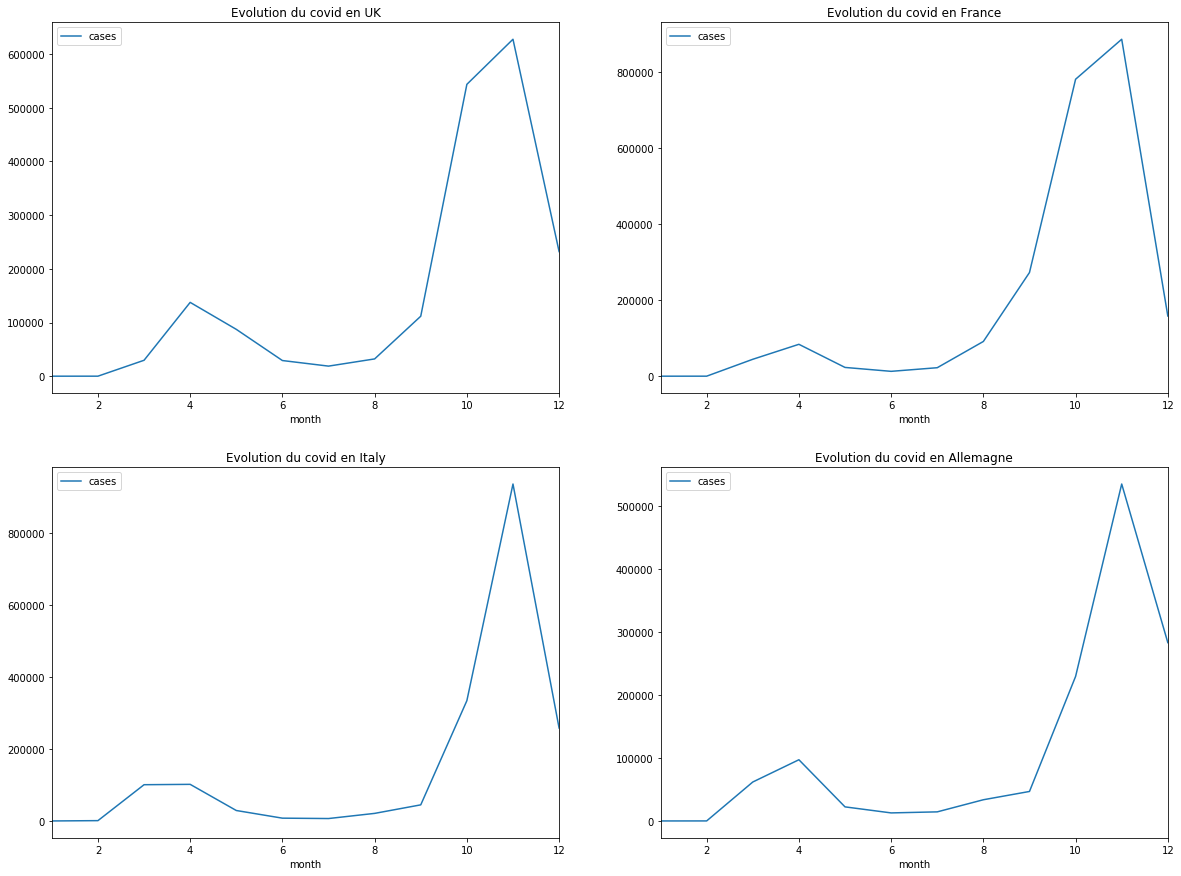

In [30]:
fig=plt.figure(figsize=(20,15))

ax1=fig.add_subplot(2,2,1)
df_uk_grouped.plot(kind='line',x='month',y='cases',ax=ax1)
ax1.set_title("Evolution du covid en UK")

ax2=fig.add_subplot(2,2,2)
df_france_grouped.plot(kind='line',x='month',y='cases',ax=ax2)
ax2.set_title("Evolution du covid en France")

ax3=fig.add_subplot(2,2,3)
df_italy_grouped.plot(kind='line',x='month',y='cases',ax=ax3)
ax3.set_title("Evolution du covid en Italy")

ax4=fig.add_subplot(2,2,4)
df_germany_grouped.plot(kind='line',x='month',y='cases',ax=ax4)
ax4.set_title("Evolution du covid en Allemagne")
plt.show()

# Situation par continent ?

In [31]:
df.columns

Index(['dateRep', 'day', 'month', 'year', 'cases', 'deaths',
       'countriesAndTerritories', 'geoId', 'countryterritoryCode',
       'popData2019', 'continentExp',
       'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'],
      dtype='object')

In [32]:
df['continentExp'].value_counts()

Europe     16657
Africa     14004
America    13105
Asia       12695
Oceania     2298
Name: continentExp, dtype: int64

In [35]:
df.groupby('continentExp')['cases', 'deaths'].sum().sort_values('cases')

,cases,deaths
continentExp,,
Oceania,53298,1151
Africa,2361775,56134
Asia,16780431,290097
Europe,21395058,479706
America,30884895,785370


In [36]:
df.groupby('continentExp')['cases', 'deaths'].sum().sort_values('deaths')

,cases,deaths
continentExp,,
Oceania,53298,1151
Africa,2361775,56134
Asia,16780431,290097
Europe,21395058,479706
America,30884895,785370
